In [32]:
import pandas as pd
import numpy as np

In [19]:
data_hormon = pd.read_csv('sample_data/hormon.csv', delimiter=';', encoding = 'latin1')
data_hormon ['somatZ'] = data_hormon['somatZ'].str.replace(',', '.').astype(float)
data_hormon_clean = data_hormon.dropna(subset=['somatZ'])


,spol,gastrS,somatS,somatZ,pusenje,alkohol,kava,CLOtest,"dijagnoza,,,"
0,z,"92,30","3,1",29.31,1,0,1,1,G
1,z,"49,50","8,5",5.52,0,0,1,1,G
2,z,"40,50","16,2",15.22,1,0,1,0,G
3,z,"42,70",16,3.67,0,0,1,0,"G,"
4,z,"48,20",16,66.97,1,0,1,0,"G,"
5,m,"48,90","24,2",3.25,0,1,1,1,G
6,z,"42,90","9,35",35.70,0,0,1,0,G
7,z,"82,30",17,0.98,0,0,1,1,"G,"
8,z,"44,50",11,13.87,0,0,1,1,"E b,"
9,z,"93,60","10,45",5.41,0,0,1,1,U b


1. Izračunati 99% interval povjerenja za varijablu, npr. razinu hormona somatostatina
(somatZ) koristeći odgovarajuće metode:

• Provjeriti normalnost uzorka pomoću Shapiro-Wilk testa prije izvođenja intervalne
procjene ili testiranja hipoteze.

• Na temelju rezultata odlučiti hoće li se koristiti parametarske metode (ako su podaci
normalno raspoređeni) ili neparametrijske metode (ako nisu).

• Ako postoje nedostajući podaci, provjeriti i obrisati redove koji ih sadrže.

• Izračunati veličinu uzorka.


In [29]:
from scipy.stats import shapiro

stat, p_value = shapiro(data_hormon_clean['somatZ'])
print(f"Shapiro-Wilk statistika: {stat}, P-vrijednost: {p_value}")


Shapiro-Wilk statistika: 0.5842365346830292, P-vrijednost: 8.508423157833798e-14


In [30]:

if p_value > 0.01:
    print("Podaci su normalno distribuirani. Koristit će se parametarske metode.")
else:
    print("Podaci nisu normalno distribuirani. Koristit će se neparametrijske metode.")

Podaci nisu normalno distribuirani. Koristit će se neparametrijske metode.


In [31]:
sample_size = len(data_hormon_clean['somatZ'])
print(f"Veličina uzorka: {sample_size}")

Veličina uzorka: 81


In [41]:
from scipy import stats
confidence_level = 0.99
lower_bound, upper_bound = stats.t.interval(confidence_level,sample_size - 1, loc=np.mean(data_hormon_clean['somatZ']), scale=stats.sem(data_hormon_clean['somatZ']))
print(f"99% interval povjerenja za somatZ (neparametarski): [{lower_bound:.2f}, {upper_bound:.2f}]")

99% interval povjerenja za somatZ (neparametarski): [12.41, 30.21]


Testirati postoji li značajna razlika između vrijednosti muških i ženskih hormona
gastrina:

• Koristiti t-test ili Mann-Whitney U test (ovisno o distribuciji podataka).


In [62]:
data_hormon_clean_gastrin = data_hormon.dropna(subset=['gastrS'])
gastrin_muski = data_hormon_clean_gastrin[data_hormon_clean_gastrin['spol'] == 'm']['gastrS']
gastrin_zenski = data_hormon_clean_gastrin[data_hormon_clean_gastrin['spol'] == 'z']['gastrS']


stat_muski, p_value_muski = shapiro(gastrin_muski)
stat_zenski, p_value_zenski = shapiro(gastrin_zenski)

if p_value_muski > 0.05 and p_value_zenski > 0.05:
  print("Podaci su normalno distribuirani. Koristit će se parametarske metode.")
else:
  print("Podaci nisu normalno distribuirani. Koristit će se neparametrijske metode.")

Podaci nisu normalno distribuirani. Koristit će se neparametrijske metode.


In [64]:
stat, p = stats.mannwhitneyu(gastrin_muski, gastrin_zenski)

print(f"P-vrijednost (Mann-Whitney): {p}")

if p_value < 0.05:
  print("Postoji statistički značajna razlika u razinama gastrina između muškaraca i žena.")
else:
  print("Nema statistički značajne razlike u razinama gastrina između muškaraca i žena.")

P-vrijednost (Mann-Whitney): 0.741472004763096
Nema statistički značajne razlike u razinama gastrina između muškaraca i žena.


3. Ispitati utjecaj pušenja na razinu hormona gastrina:

• Podijeliti uzorak na pušače i nepušače.

• Koristiti Mann-Whitney U test za ispitivanje postoji li značajna razlika u razini hormona somatostatina između pušača i nepušača.


In [68]:
data_hormon_clean_pusenje = data_hormon_clean_gastrin.dropna(subset=['pusenje'])
gastrin_pusaci = data_hormon_clean_pusenje[data_hormon_clean_pusenje['pusenje'] == 1]['gastrS']
gastrin_nepusaci = data_hormon_clean_pusenje[data_hormon_clean_pusenje['pusenje'] == 0]['gastrS']

stat, p = stats.mannwhitneyu(gastrin_pusaci, gastrin_nepusaci)

print(f"P-vrijednost (Mann-Whitney): {p}")

if p < 0.05:
  print("Postoji statistički značajna razlika u razinama gastrina između pušača i nepušača.")
else:
  print("Nema statistički značajne razlike u razinama gastrina između pušača i nepušača.")

P-vrijednost (Mann-Whitney): 0.6277757473126921
Nema statistički značajne razlike u razinama gastrina između pušača i nepušača.


1. Ispitati odnos između čitanja i spola

• Koristiti Chi-square test za ispitivanje postojanja značajne razlike između razina obrazovanja u navikama čitanja.

• Vizualizirati rezultate pomoću stupčastih dijagrama.

In [74]:
data_books = pd.read_csv('sample_data/knjiga.csv', delimiter=';', encoding = 'latin1')
data_books = data_books.dropna()
data_books.head(5)


,citanje,spol,obrazovanje
0,0,Z,SSS
1,0,M,SSS
2,1,Z,NSS
3,1,Z,VSS
4,0,Z,NSS


In [81]:
contingency_table = pd.crosstab(data_books['spol'], data_books['citanje'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistika: {chi2}")
print(f"P-vrijednost: {p}")

if p < 0.05:
    print("Postoji statistički značajna razlika između spola i navike čitanja.")
else:
    print("Nema statistički značajne razlike između spola i navike čitanja.")

Chi-square statistika: 7.526497823468092
P-vrijednost: 0.0060797983853609705
Postoji statistički značajna razlika između spola i navike čitanja.


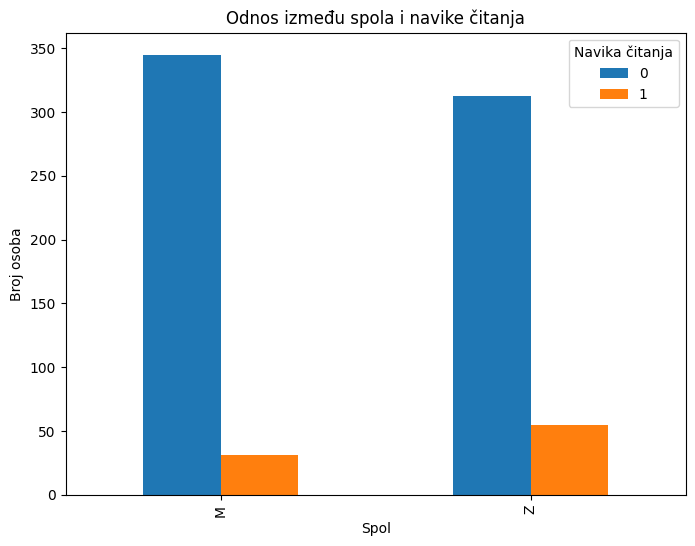

In [83]:
import matplotlib.pyplot as plt
contingency_table.plot(kind='bar', figsize=(8, 6))
plt.title('Odnos između spola i navike čitanja')
plt.xlabel('Spol')
plt.ylabel('Broj osoba')
plt.legend(title='Navika čitanja')
plt.show()

Istražiti utjecaj obrazovanja na čitanje:

o Izračunati postotak žena, odnosno muškaraca koje čitaju za svaku razinu
obrazovanja.

o Vizualizirati rezultate uz interpretaciju u izvješću.

In [132]:

men = data_books[data_books['spol'] == 'M']
men_vss = men[men['obrazovanje'] == 'VSS']
men_sss = men[men['obrazovanje'] == 'SSS']
men_nss = men[men['obrazovanje'] == 'NSS']

men_vss_citanje = men_vss[men_vss['citanje'] == 1]
percentage_men_vss = (men_vss_citanje.shape[0] / men_vss.shape[0]) * 100
print(f"Postotak muškaraca koji čitaju za VSS je: {percentage_men_vss:.2f}%")

men_sss_citanje = men_sss[men_sss['citanje'] == 1]
percentage_men_sss = (men_sss_citanje.shape[0] / men_sss.shape[0]) * 100
print(f"Postotak muškaraca koji čitaju za SSS je: {percentage_men_sss:.2f}%")

men_nss_citanje = men_nss[men_nss['citanje'] == 1]
percentage_men_nss = (men_nss_citanje.shape[0] / men_nss.shape[0]) * 100
print(f"Postotak muškaraca koji čitaju za NSS je: {percentage_men_nss:.2f}%")

women = data_books[data_books['spol'] == 'Z']
women_vss = women[women['obrazovanje'] == 'VSS']
women_sss = women[women['obrazovanje'] == 'SSS']
women_nss = women[women['obrazovanje'] == 'NSS']

women_vss_citanje = women_vss[women_vss['citanje'] == 1]
percentage_women_vss = (women_vss_citanje.shape[0] / women_vss.shape[0]) * 100
print(f"Postotak žena koji čitaju za VSS je: {percentage_women_vss:.2f}%")

women_sss_citanje = women_sss[women_sss['citanje'] == 1]
percentage_women_sss = (women_sss_citanje.shape[0] / women_sss.shape[0]) * 100
print(f"Postotak žena koji čitaju za SSS je: {percentage_women_sss:.2f}%")

women_nss_citanje = women_nss[women_nss['citanje'] == 1]
percentage_women_nss = (women_nss_citanje.shape[0] / women_nss.shape[0]) * 100
print(f"Postotak žena koji čitaju za NSS je: {percentage_women_nss:.2f}%")

Postotak muškaraca koji čitaju za VSS je: 9.48%
Postotak muškaraca koji čitaju za SSS je: 6.55%
Postotak muškaraca koji čitaju za NSS je: 16.13%
Postotak žena koji čitaju za VSS je: 9.20%
Postotak žena koji čitaju za SSS je: 14.52%
Postotak žena koji čitaju za NSS je: 33.33%


In [141]:
education_reading_percentage = data_books.groupby(['spol', 'obrazovanje'])['citanje'].mean() * 100
print(f'Postotak muškaraca koji čitaju za razlicite obrazovanja:\n{education_reading_percentage.loc["M"]}')
print(f'Postotak žena koji čitaju za razlicite obrazovanja:\n{education_reading_percentage.loc["Z"]}')


Postotak muškaraca koji čitaju za razlicite obrazovanja:
obrazovanje
NSS    16.129032
SSS     6.550218
VSS     9.482759
Name: citanje, dtype: float64
Postotak žena koji čitaju za razlicite obrazovanja:
obrazovanje
NSS    33.333333
SSS    14.516129
VSS     9.195402
Name: citanje, dtype: float64


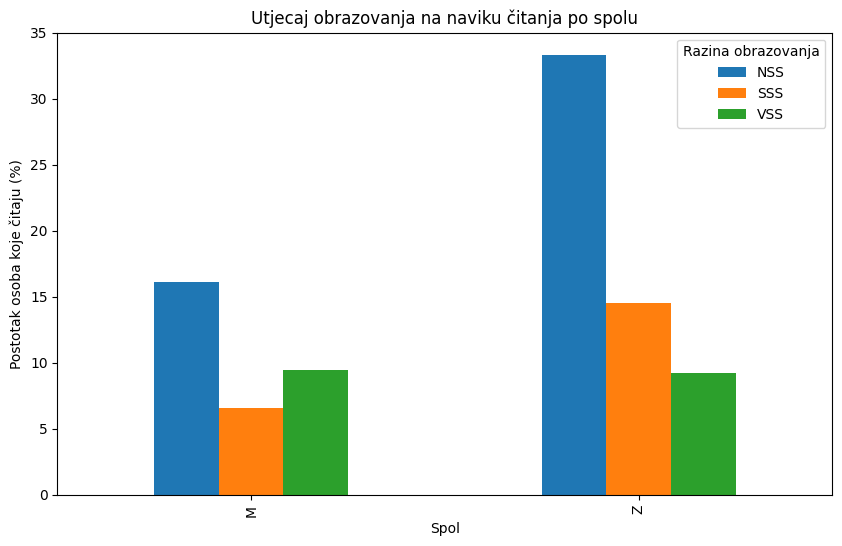

In [139]:
education_reading_percentage.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Utjecaj obrazovanja na naviku čitanja po spolu')
plt.xlabel('Spol')
plt.ylabel('Postotak osoba koje čitaju (%)')
plt.legend(title='Razina obrazovanja')
plt.show()
